In [7]:
import sklearn
# Librería para representar gráficamente los datos
import mglearn
# Datos sobre el cancer donde tiene 30 características para
# saber si un tumor es maligno o benigno
from sklearn.datasets import load_breast_cancer
# Librería para la representación gráfica
import matplotlib.pyplot as plt
# Algoritmo PCA
from sklearn.decomposition import PCA
# Permite ver las gráficas en nuestro editor jupyter
%matplotlib inline

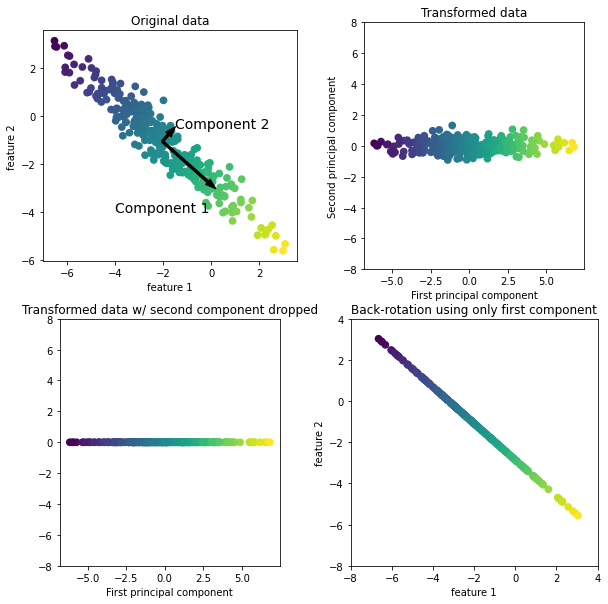

In [4]:
# Ejemplo de lo que hace PCA
# En el recuadro "original data" se ve como encuentra los dos ejes
# explicados anteriormente. El largo es el component 1 y el corto el 2
# Aquí se ve mejor el eje ortogonal
# En el recuadro "transformed data" lo que hace es ver los datos horizontalmente
# lo que hace es retar el valor promedio a cada datos haciendo que los datos
# se centren en el eje 0.
# En el recuadro "transformed data..." lo que hace es representar los datos
# con el eje horizontal del component 1. El segundo eje va ser las caracaterísticas
# (feature 2) de la primera gráfica. Lo que se ve es una línea recta de los datos
# que se ven la segunda gráfica al eje del component 1. 
# En el recuadro "back-rotation..." lo que hace es sumar de nuevo el promedio
# que le resto en la segunda gráfica y lo va rotar de nuevo. Con lo cual
# queda como en la primera imagen pero eliminando el ruido que habia.
mglearn.plots.plot_pca_illustration()

In [12]:
# Datos para entrenar el algoritmo
cancer = load_breast_cancer()
print("Valor de las características: ", cancer.feature_names)
print("Número de características: ", cancer.feature_names.shape)

Valor de las características:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Número de características:  (30,)


In [8]:
# Algoritmo PCA donde se le indica el número de ejes. 
# El eje 1 será el que más variedad de datos talc omo se ve en el gráfico
# de ejemplo. El eje 2 que es el ortogonal.
pca = PCA(n_components=2)

# Datos para el entrenamiento algoritmo
pca.fit(cancer.data)

PCA(n_components=2)

In [9]:
# Genera una variable con los datos transformados.
# Es decir, transforma las 30 características a las 2 que se
# le ha indicado
transformada = pca.transform(cancer.data)

In [11]:
# Comparativa de las características originales versus la transformada
print("Mediciones, características de los datos originales: ", cancer.data.shape)
print("Mediciones, características de los datos procesados: ", transformada.shape)

Características de los datos originales:  (569, 30)
Características de los datos procesados:  (569, 2)


Text(0, 0.5, 'PCA 2')

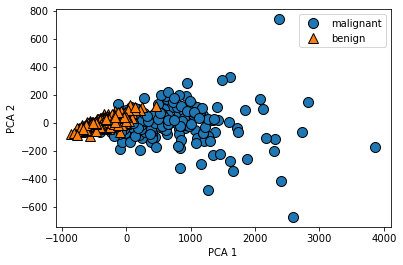

In [15]:
# Al gráfico se le pasa como eje X los valores principal, y en el 1 las características
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0, 0.5, 'PCA 2')

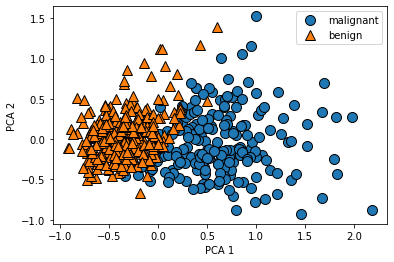

In [17]:
# Para ver cuan de importante es procesar los datos y para ver 
# se va usar la función MinMaxScaler que permitira ver los datos en una escalar similar, 
# que será un rango de 0 a 1. De esta manera se puede validar que no se procesando datos
# con valores muy pequeños contra valores muy grandes.
from sklearn.preprocessing import MinMaxScaler
escala = MinMaxScaler()
# Pasamos los datos a la función
escala.fit(cancer.data)
# transformamos los datos para que todos los datos esten en rango similar, de 0 a 1.
escalada = escala.transform(cancer.data)
# Se le pasa los datos tratados al algoritmo PCA
pca.fit(escalada)
transformada=pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca()
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

In [19]:
# Los datos escalados se verán que van siempre de 0 a 1.
print("Ejemplo de datos escalados: ", escalada)

Ejemplo de datos escalados:  [[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [20]:
# Aquí los datos son más dispersos lo que puede afectar al tratamiento en los algoritmos de clasificación
print("Ejemplo de datos sin escalar: ", cancer.data)

Ejemplo de datos sin escalar:  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
